<a href="https://colab.research.google.com/github/Rajakumaran-S/Rajakumaran-S/blob/main/Self_Project_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent for Optimization

In [10]:
# Matrix computations
from numpy import *
from numpy.linalg import norm

# Plotting
from matplotlib.pyplot import *

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

## Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


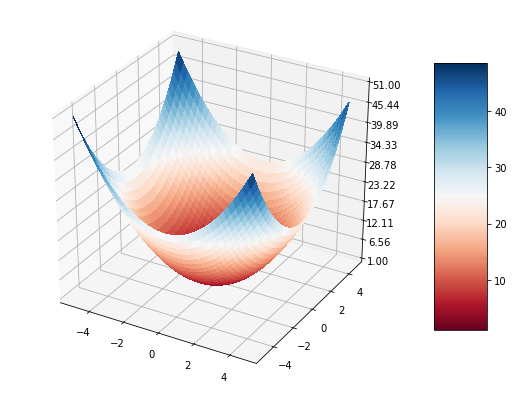

In [ ]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
x = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X,Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
show()    

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent iteration. 

In [ ]:
# Your code here

def partial_differ_for_x(x):
  return 2*x

def partial_differ_for_y(y):
  return 2*y

def gradf(x, y):
    return array([partial_differ_for_x(x), partial_differ_for_y(y)])

In [ ]:
x

array([-5.  , -4.75, -4.5 , -4.25, -4.  , -3.75, -3.5 , -3.25, -3.  ,
       -2.75, -2.5 , -2.25, -2.  , -1.75, -1.5 , -1.25, -1.  , -0.75,
       -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,
        1.75,  2.  ,  2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,
        4.  ,  4.25,  4.5 ,  4.75])

In [ ]:
def grad_descent2(gradf, init_t, learning_rate):
  epsilon = 0.0000001
  prev_t = init_t-10*epsilon
  t = init_t.copy()
    
  iter = 0
  while norm(t - prev_t) > epsilon:
    prev_t = t.copy()
    t -= learning_rate*gradf(t[0], t[1])
    iter += 1
    
  return t

In [ ]:
grad_descent2(f, gradf, array([15.0, 10.0]), 0.5)

array([0., 0.])

In [ ]:
grad_descent2(f, gradf, array([15.0, 10.0]), 0.1)

array([3.31283825e-07, 2.20855883e-07])

In [ ]:
a = array([15.0, 10.0]).copy()

In [ ]:
a

array([15., 10.])